In [1]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git
%cd FastSAM
!pip install -r requirements.txt
%pip install git+https://github.com/openai/CLIP.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1329, done.
remote: Counting objects: 100% (494/494), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 1329 (delta 377), reused 399 (delta 338), pack-reused 835
Receiving objects: 100% (1329/1329), 72.57 MiB | 24.50 MiB/s, done.
Resolving deltas: 100% (530/530), done.
/content/FastSAM
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [8]:
%pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ezs69bah
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ezs69bah
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.3 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=2722f6b32c530088e2f6461e873057313e4670f5b896a1189e9476fd1e60594b
  Stored in directory: /tmp/pip-ephem-wheel-cache-m9co_cf2/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mv CLIP fastsam/CLIP

In [4]:
from PIL import Image

In [5]:
import cv2
from google.colab.patches import cv2_imshow

In [6]:
img = cv2.imread('/content/dogs.jpg')

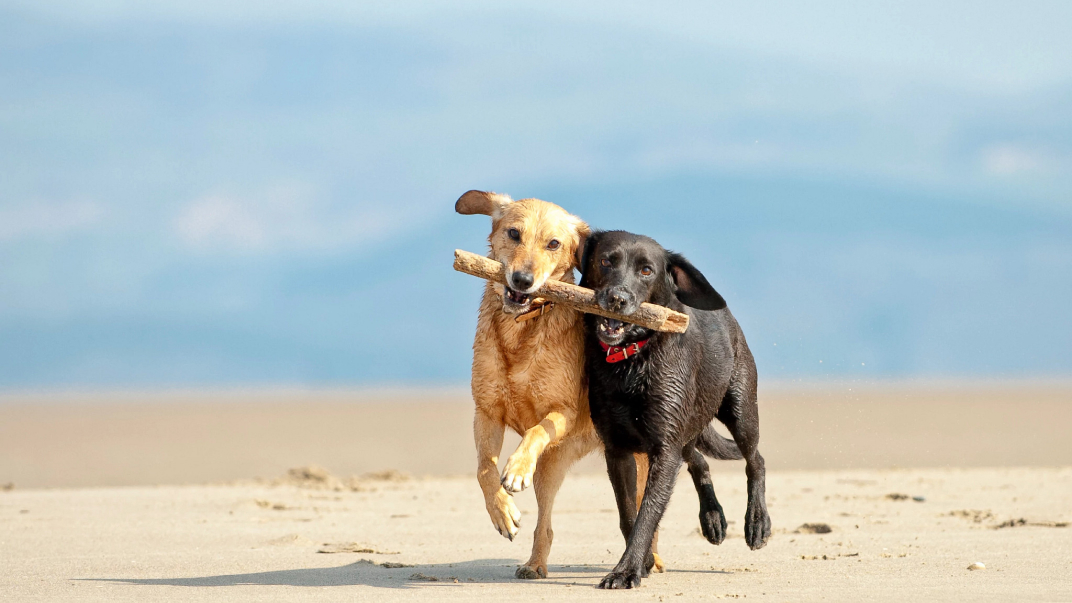

In [ ]:
cv2_imshow(img)

In [ ]:
%cd FastSAM

/content/FastSAM


In [ ]:
!tree

.
├── app_gradio.py
├── assets
│   ├── anomaly.png
│   ├── building.png
│   ├── dog_clip.png
│   ├── eightpic.pdf
│   ├── eightpic.png
│   ├── head_fig.png
│   ├── hf_everything_mode.png
│   ├── hf_points_mode.png
│   ├── logo.png
│   ├── more_usages
│   │   ├── box_prompt.png
│   │   ├── draw_edge.png
│   │   ├── everything_mode.png
│   │   ├── everything_mode_without_retina.png
│   │   ├── more_points.png
│   │   └── text_prompt_cat.png
│   ├── Overview.png
│   ├── replicate-1.png
│   ├── replicate-2.png
│   ├── replicate-3.png
│   └── salient.png
├── cog.yaml
├── examples
│   ├── dogs.jpg
│   ├── sa_10039.jpg
│   ├── sa_11025.jpg
│   ├── sa_1309.jpg
│   ├── sa_192.jpg
│   ├── sa_414.jpg
│   ├── sa_561.jpg
│   ├── sa_862.jpg
│   └── sa_8776.jpg
├── fastsam
│   ├── decoder.py
│   ├── __init__.py
│   ├── model.py
│   ├── predict.py
│   ├── prompt.py
│   ├── __pycache__
│   │   ├── decoder.cpython-310.pyc
│   │   ├── __init__.cpython-310.pyc
│   │   ├── model.cpython-310.pyc
│   │   ├──

In [9]:
from fastsam.model import FastSAM
from fastsam.prompt import FastSAMPrompt

model = FastSAM('/content/FastSAM-x.pt')
img_path = '/content/dogs.jpg'

everythingResult = model(img_path, retina_masks=True, imgsz=1024, conf=0.5, iou=0.9)
everythingResult

100%|██████████| 138M/138M [00:00<00:00, 351MB/s]

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dogs.jpg: 576x1024 16 objects, 137.4ms
Speed: 15.2ms preprocess, 137.4ms inference, 839.4ms postprocess per image at shape (1, 3, 1024, 1024)


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.yolo.engine.results.Masks object
 names: {0: 'object'}
 orig_img: array([[[220, 203, 176],
         [220, 203, 176],
         [220, 203, 176],
         ...,
         [227, 217, 193],
         [226, 216, 192],
         [227, 217, 193]],
 
        [[220, 203, 176],
         [220, 203, 176],
         [219, 202, 175],
         ...,
         [228, 218, 194],
         [227, 217, 193],
         [228, 218, 194]],
 
        [[220, 203, 176],
         [220, 203, 176],
         [219, 202, 175],
         ...,
         [227, 217, 193],
         [227, 217, 193],
         [228, 218, 194]],
 
        ...,
 
        [[193, 218, 234],
         [194, 219, 235],
         [187, 212, 228],
         ...,
         [187, 213, 227],
         [183, 209, 223],
         [187, 213, 227]],
 
        [[192, 217, 233],
         [189, 214,

In [10]:
prompt_process = FastSAMPrompt(img_path, everythingResult)
aan = prompt_process.everything_prompt()

In [11]:
prompt_process.plot(annotations=aan, output_path='./output/dog_test.jpg')

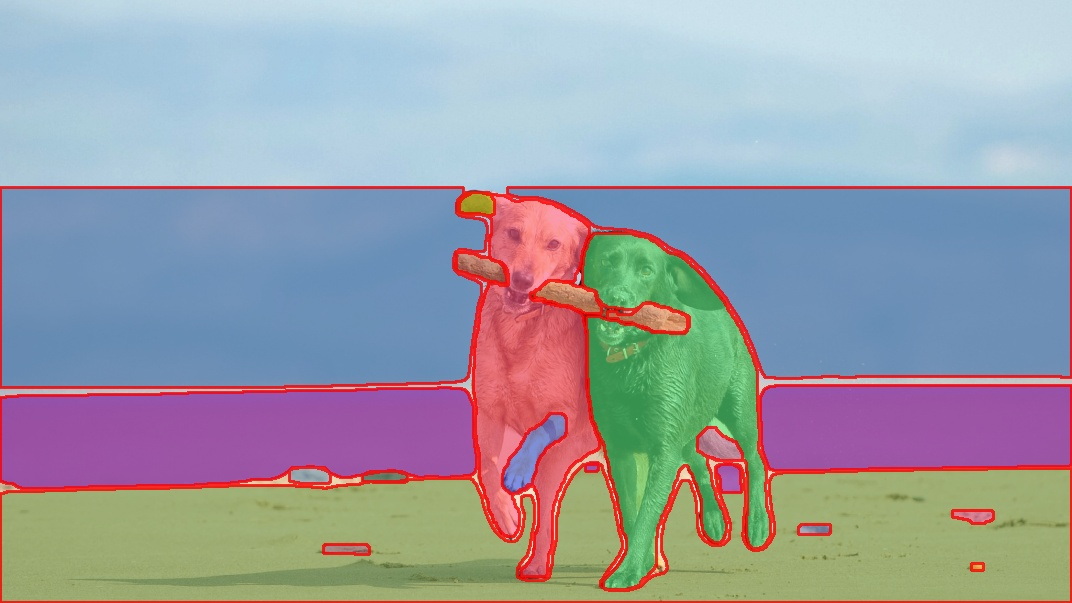

In [12]:
img = cv2.imread('./output/dog_test.jpg')
cv2_imshow(img)


image 1/1 /content/EC.RPP.272.shrunk.png: 800x1024 98 objects, 145.0ms
Speed: 8.6ms preprocess, 145.0ms inference, 31.6ms postprocess per image at shape (1, 3, 1024, 1024)


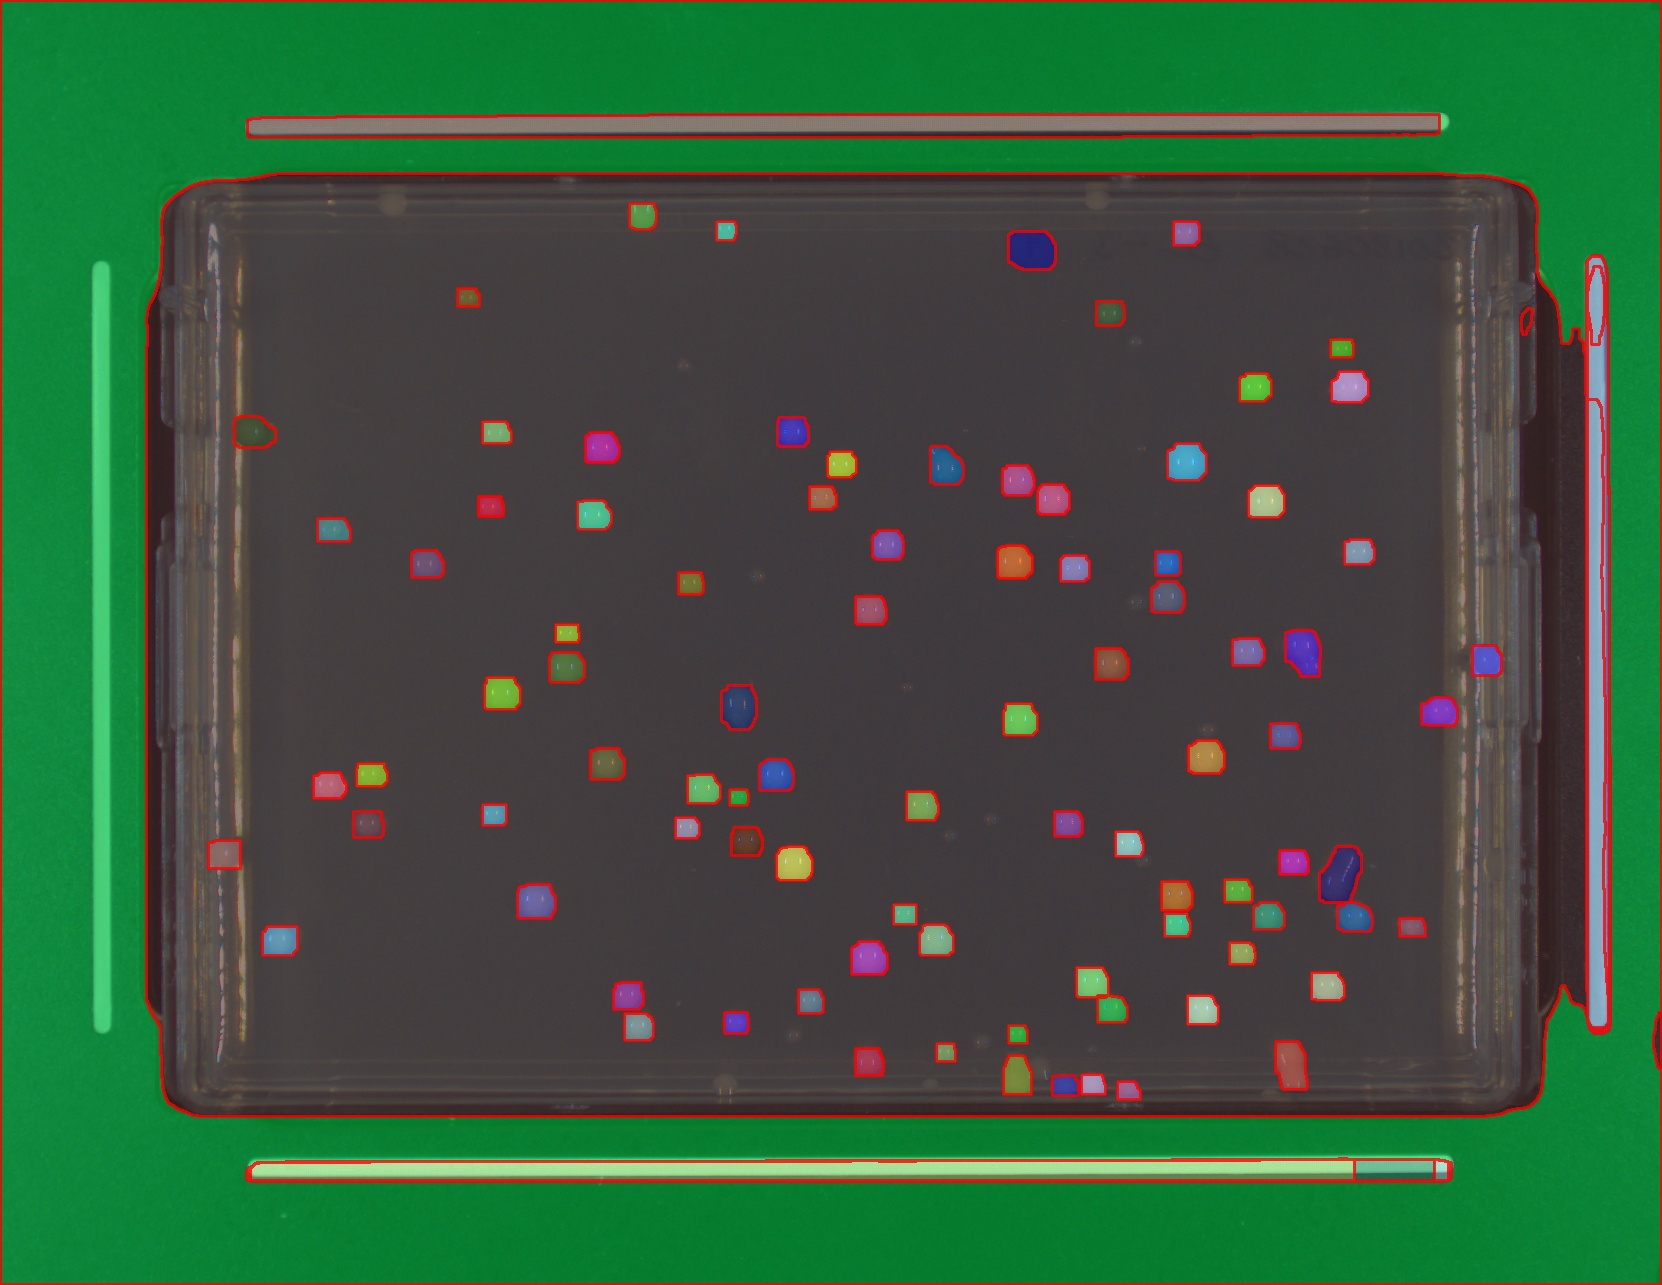

In [ ]:
newresult = model('/content/EC.RPP.272.shrunk.png', retina_masks=True, imgsz=1024, conf=0.10, iou=0.9)
prompt_process = FastSAMPrompt('/content/EC.RPP.272.shrunk.png', newresult)
aan = prompt_process.everything_prompt()
prompt_process.plot(annotations=aan, output_path='./output/colnees.jpg')
img = cv2.imread('./output/colnees.jpg')
cv2_imshow(img)

In [13]:
from __future__ import annotations

In [15]:
aan = prompt_process.text_prompt('the yellow dog')
prompt_process.plot(annotations=aan, output_path='./output/yellow_dog.jpg')

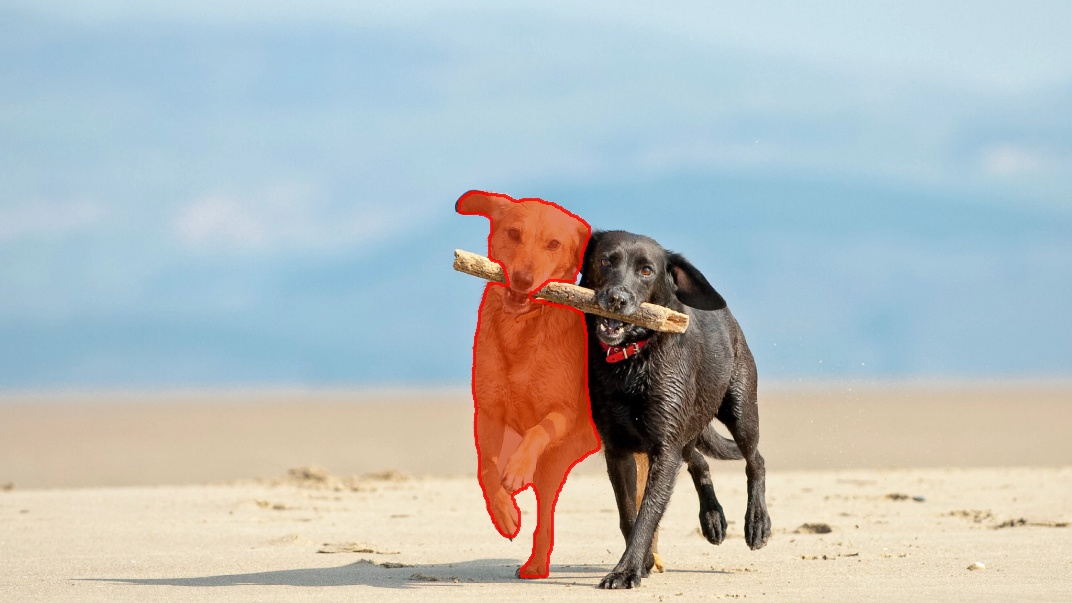

In [16]:
img = cv2.imread('./output/yellow_dog.jpg')
cv2_imshow(img)

In [18]:
# The label 1 specifies that the point at (230, 345) should be considered as background. This means:
# The model will interpret this point as not being part of the object of interest.
# It will use this information to refine its segmentation, ensuring that the area around this point is not included in the segmented region.typically indicates that this is a foreground point, meaning it's part of the object you want to segment.
aan = prompt_process.point_prompt([[230, 345]], pointlabel=[1])
prompt_process.plot(annotations=aan, output_path='./output/dog_point_test.jpg')

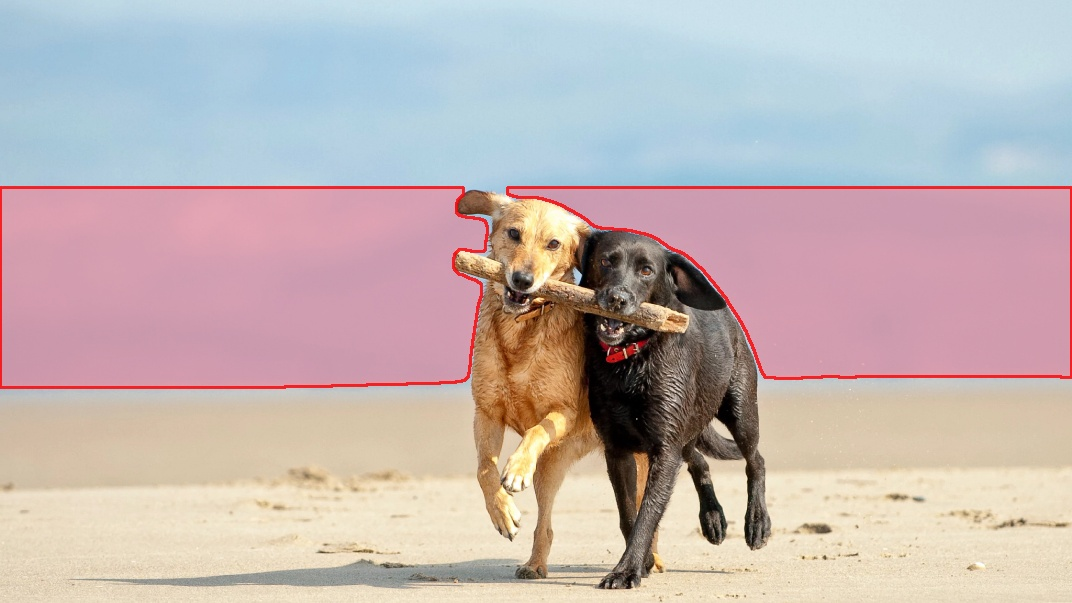

In [19]:
img = cv2.imread('./output/dog_point_test.jpg')
cv2_imshow(img)

In [20]:
# The label 0 typically indicates that this is a foreground point, meaning it's part of the object you want to segment.
aan = prompt_process.point_prompt([[230, 345]], pointlabel=[0])
prompt_process.plot(annotations=aan, output_path='./output/dog_point_test2.jpg')

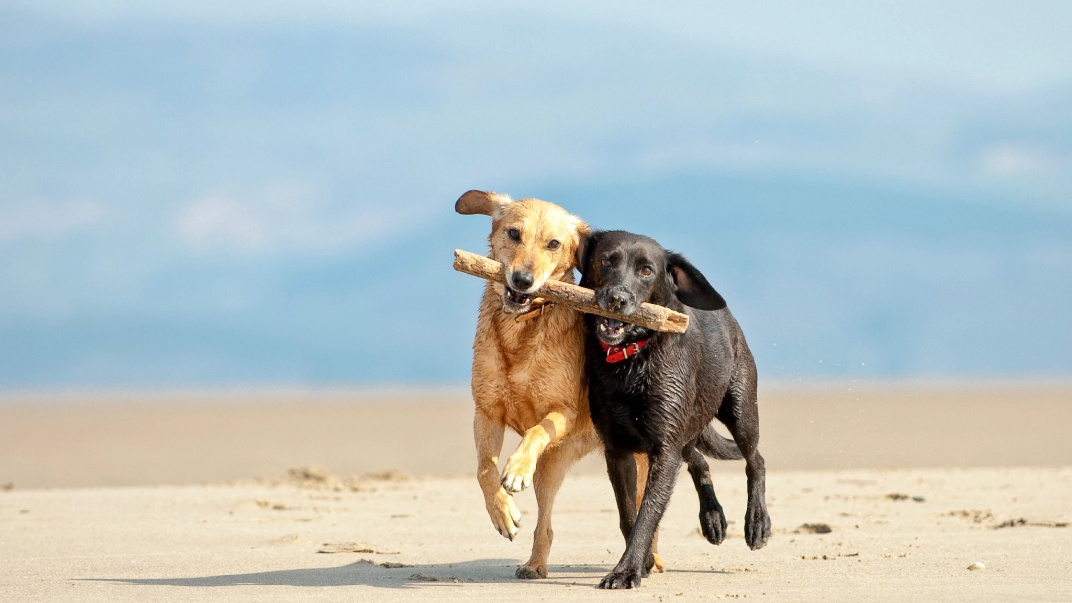

In [21]:
img = cv2.imread('./output/dog_point_test2.jpg')
cv2_imshow(img)

In [28]:
# The label 1 typically indicates that this is a background point, meaning it's part of the object you want to segment.
aan = prompt_process.point_prompt([[20, 460]], pointlabel=[1])
prompt_process.plot(annotations=aan, output_path='./output/dog_point_test3.jpg')

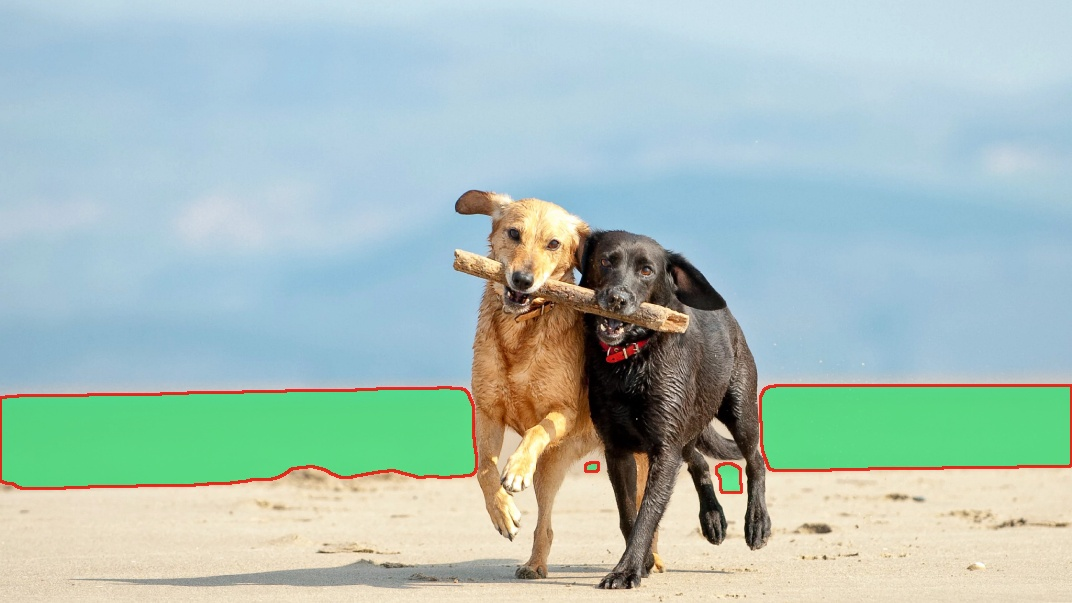

In [27]:
img = cv2.imread('./output/dog_point_test3.jpg')
cv2_imshow(img)

In [30]:
# The label 1 typically indicates that this is a background point, meaning it's not part of the object you want to segment.
aan = prompt_process.point_prompt([[20, 600]], pointlabel=[1])
prompt_process.plot(annotations=aan, output_path='./output/dog_point_test4.jpg')

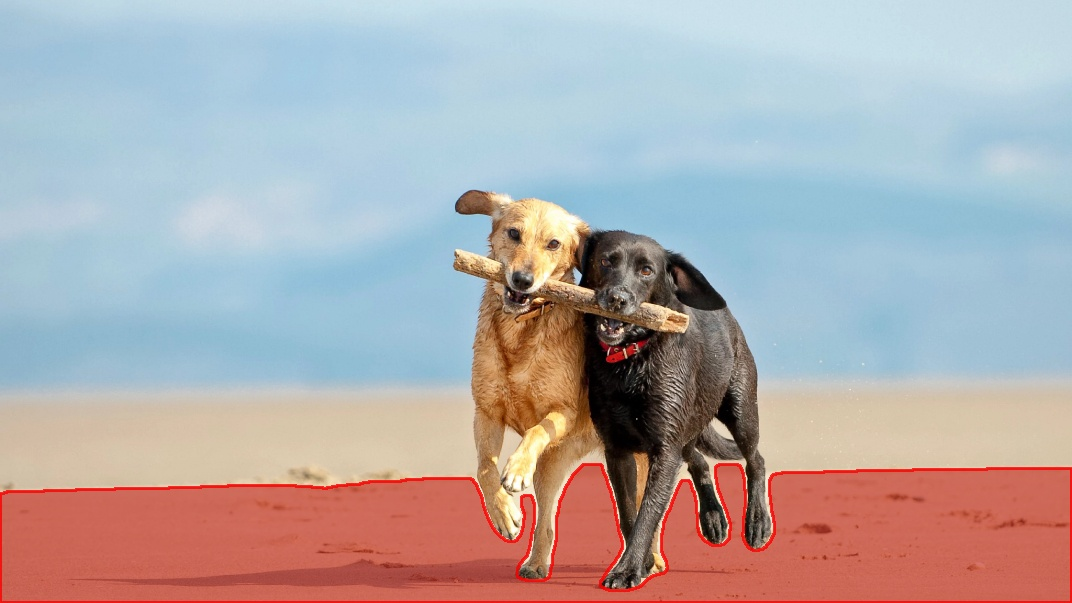

In [31]:
img = cv2.imread('./output/dog_point_test4.jpg')
cv2_imshow(img)